In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#we will do a comphresnisve analysis on "insurance" dataset.

In [3]:
df=pd.read_csv("C:\\Users\\rautu\\OneDrive\\Desktop\\insurance dataset.csv")

In [4]:
df['Policy Type'].value_counts()

Policy Type
Premium          350988
Comprehensive    349259
Basic            348328
Name: count, dtype: int64

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   Age                   1032254 non-null  float64
 2   Gender                1048575 non-null  object 
 3   Annual Income         1009366 non-null  float64
 4   Marital Status        1032269 non-null  object 
 5   Number of Dependents  952871 non-null   float64
 6   Education Level       1048575 non-null  object 
 7   Occupation            735638 non-null   object 
 8   Health Score          983942 non-null   float64
 9   Location              1048575 non-null  object 
 10  Policy Type           1048575 non-null  object 
 11  Previous Claims       730583 non-null   float64
 12  Vehicle Age           1048570 non-null  float64
 13  Credit Score          928164 non-null   float64
 14  Insurance Duration    1048574 non-

In [6]:
#STEPS I WILL FOLLOW IN THIS ANALYSIS:::
# 1. EDA/PREPROCESSING
# 2. DESCRIPTIVE ANALYTICS
# 3. DIAGNOSTIC  ANALYTICS
# 4. PREDICTIVE ANALYTICS
# 5. PRESCRIPTIVE ANALYTICS

# **DATA CLEANING/PREPROCESSING**

In [8]:
df.describe() #the count for each features says that there are missing data.

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.048575e+06,1.032254e+06,1.009366e+06,952871.000000,983942.000000,730583.000000,1.048570e+06,928164.000000,1.048574e+06,1.048575e+06
mean,5.242870e+05,4.114057e+01,3.276203e+04,2.009702,25.610221,1.002773,9.570021e+00,592.940001,5.019679e+00,1.102495e+03
std,3.026977e+05,1.353652e+01,3.220290e+04,1.417424,12.203206,0.982726,5.774606e+00,149.972058,2.593570e+00,8.654324e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000,2.012237,0.000000,0.000000e+00,300.000000,1.000000e+00,2.000000e+01
25%,2.621435e+05,3.000000e+01,7.991000e+03,1.000000,15.919120,0.000000,5.000000e+00,468.000000,3.000000e+00,5.140000e+02
50%,5.242870e+05,4.100000e+01,2.393400e+04,2.000000,24.573981,1.000000,1.000000e+01,595.000000,5.000000e+00,8.720000e+02
75%,7.864305e+05,5.300000e+01,4.463600e+04,3.000000,34.520860,2.000000,1.500000e+01,721.000000,7.000000e+00,1.509000e+03
max,1.048574e+06,6.400000e+01,1.499970e+05,4.000000,58.975914,9.000000,1.900000e+01,849.000000,9.000000e+00,4.999000e+03


In [9]:
# we are going to make a function that checks for null values and displays the total in % .

In [10]:
def check_null(data):
    null={}
    data=data.replace([""," "],np.nan)
    for cols in data.columns:
        total_null=data[cols].isnull().sum()
        null[cols]=(total_null/len(data))*100
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(null.keys()),y=list(null.values()))
    plt.xticks(rotation=90)
    return null    
        

{'id': 0.0,
 'Age': 1.5564933361943591,
 'Gender': 0.0,
 'Annual Income': 3.7392651932384426,
 'Marital Status': 1.5550628233555064,
 'Number of Dependents': 9.12705338197077,
 'Education Level': 0.0,
 'Occupation': 29.84402641680376,
 'Health Score': 6.163889087571228,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.32610924349713,
 'Vehicle Age': 0.00047683761295090957,
 'Credit Score': 11.483298762606395,
 'Insurance Duration': 9.536752259018191e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.472879860763417,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

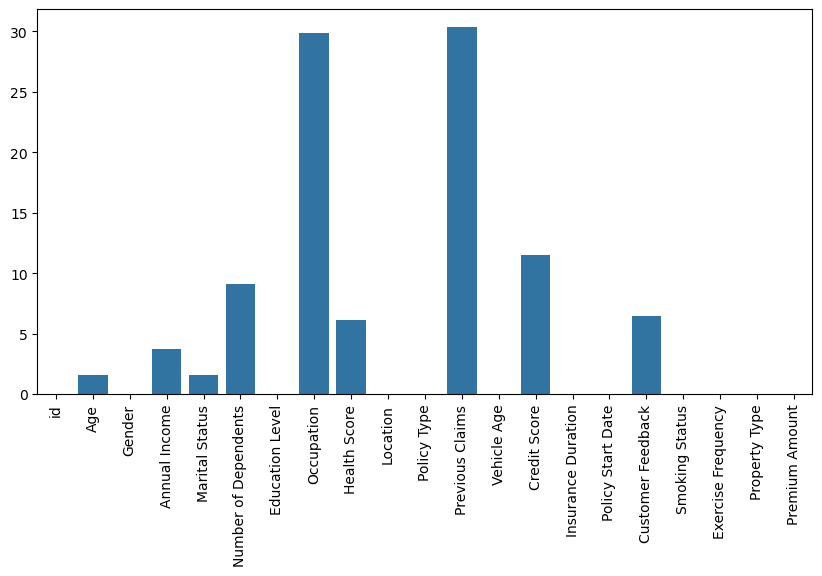

In [11]:
check_null(df) #it shows almost 30% data are missing in "occupation" and "previous claims"
               #tells me that data doesn't have entire missing rows.
               #now we are going to impute those null values and call the same function sequentially.

In [12]:
#using conditional filtering to check if we have same nan values for 4 major missing column.
#i am considering dropping them all. dropping less than 1% of data would not have significant effect. 
#in the next cell, i will drop them.
df[(df['Occupation'].isnull())&(df['Previous Claims'].isnull())&(df['Credit Score'].isnull())&(df['Number of Dependents'].isnull())] 

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
678,678,62.0,Male,NaN,Single,NaN,Master's,NaN,51.726013,Urban,...,NaN,7.0,NaN,3.0,21:39.2,Poor,Yes,Rarely,Condo,1737
1764,1764,64.0,Male,27539.0,Single,NaN,PhD,NaN,14.735658,Urban,...,NaN,9.0,NaN,5.0,21:39.2,Average,No,Monthly,Apartment,926
3501,3501,41.0,Female,2586.0,Single,NaN,PhD,NaN,46.253253,Suburban,...,NaN,8.0,NaN,6.0,21:39.2,Poor,No,Monthly,Condo,3719
3853,3853,19.0,Female,NaN,Single,NaN,Bachelor's,NaN,18.144310,Urban,...,NaN,19.0,NaN,1.0,21:39.3,Poor,No,Weekly,Apartment,175
7578,7578,64.0,Female,4418.0,Single,NaN,PhD,NaN,4.752325,Suburban,...,NaN,19.0,NaN,7.0,21:39.1,Average,No,Monthly,Condo,3341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044141,1044141,20.0,Female,9064.0,Single,NaN,Bachelor's,NaN,6.391179,Urban,...,NaN,5.0,NaN,8.0,21:39.1,Poor,Yes,Weekly,Apartment,120
1044742,1044742,31.0,Male,147539.0,Married,NaN,Master's,NaN,39.992125,Urban,...,NaN,9.0,NaN,5.0,21:39.3,Poor,No,Daily,Apartment,166
1044877,1044877,58.0,Female,17082.0,Divorced,NaN,Bachelor's,NaN,38.494549,Suburban,...,NaN,2.0,NaN,2.0,21:39.3,NaN,No,Weekly,Condo,1499
1048067,1048067,64.0,Female,86517.0,Married,NaN,Bachelor's,NaN,25.441107,Rural,...,NaN,18.0,NaN,9.0,21:39.2,Poor,Yes,Monthly,House,2128


## **DROPPING NAN VALUES**


In [14]:
index=df[(df['Occupation'].isnull())&(df['Previous Claims'].isnull())&(df['Credit Score'].isnull())&(df['Number of Dependents'].isnull())].index 

In [15]:
df=df.drop(index).reset_index(drop=True) #later we will calculate the percent of dropped data

{'id': 0.0,
 'Age': 1.5555897084414798,
 'Gender': 0.0,
 'Annual Income': 3.739868286531682,
 'Marital Status': 1.5548260414270263,
 'Number of Dependents': 9.040481033852405,
 'Education Level': 0.0,
 'Occupation': 29.77719060269555,
 'Health Score': 6.164511057421077,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.259732697453266,
 'Vehicle Age': 0.0004772918840333455,
 'Credit Score': 11.398971149614779,
 'Insurance Duration': 9.545837680666911e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.471791572361746,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

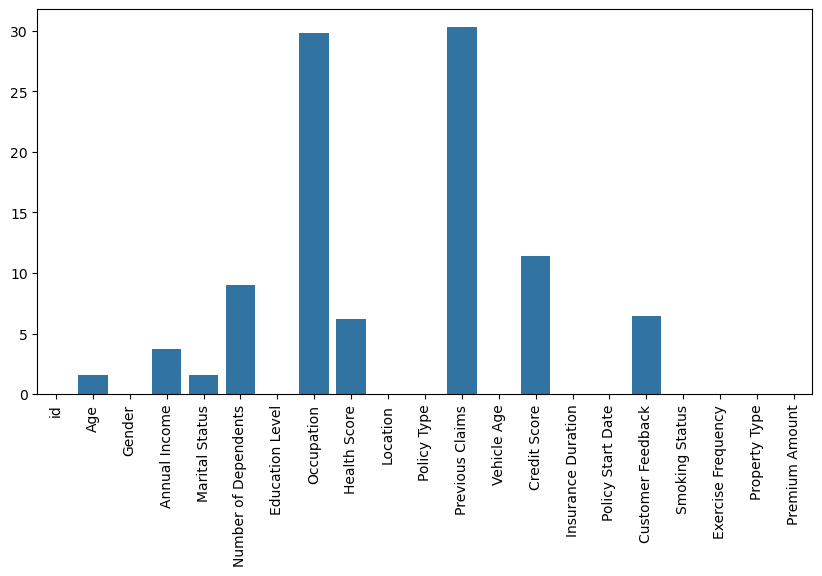

In [16]:
check_null(df)
#in next step, i will drop the rows with same nan values for minor columns.  

In [17]:
df[(df['Age'].isnull())&(df['Marital Status'].isnull())] 

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1886,1888,NaN,Female,4947.0,NaN,0.0,High School,Employed,34.908408,Rural,...,0.0,17.0,767.0,3.0,21:39.1,Good,Yes,Daily,Condo,496
2535,2537,NaN,Female,4544.0,NaN,2.0,High School,NaN,28.567803,Rural,...,1.0,5.0,639.0,3.0,21:39.2,Good,Yes,Monthly,Apartment,3634
6278,6282,NaN,Female,132579.0,NaN,2.0,High School,Employed,5.672443,Urban,...,2.0,7.0,734.0,1.0,21:39.1,NaN,No,Daily,Apartment,1722
14416,14427,NaN,Female,18644.0,NaN,3.0,Bachelor's,NaN,37.793673,Urban,...,NaN,6.0,NaN,9.0,21:39.2,Good,No,Rarely,Condo,312
19422,19437,NaN,Female,34693.0,NaN,0.0,High School,Self-Employed,4.677592,Rural,...,1.0,8.0,NaN,7.0,21:39.2,Good,Yes,Monthly,House,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035796,1036783,NaN,Male,5365.0,NaN,1.0,High School,Employed,38.547677,Rural,...,3.0,13.0,435.0,3.0,21:39.1,NaN,Yes,Daily,Condo,2908
1041340,1042331,NaN,Female,138855.0,NaN,2.0,Master's,NaN,NaN,Rural,...,1.0,11.0,462.0,6.0,21:39.1,Average,Yes,Rarely,Apartment,1391
1041857,1042848,NaN,Female,1208.0,NaN,4.0,PhD,NaN,25.501534,Urban,...,NaN,3.0,692.0,7.0,21:39.2,Good,No,Monthly,House,515
1045248,1046244,NaN,Female,24294.0,NaN,2.0,Master's,NaN,42.972122,Rural,...,NaN,12.0,772.0,9.0,21:39.2,Average,No,Daily,House,2944


In [18]:
index_2=df[(df['Age'].isnull())&(df['Marital Status'].isnull())].index

In [19]:
df=df.drop(index_2).reset_index(drop=True)

{'id': 0.0,
 'Age': 1.5312445694621881,
 'Gender': 0.0,
 'Annual Income': 3.739551883955017,
 'Marital Status': 1.5304807135941518,
 'Number of Dependents': 9.040711608126664,
 'Education Level': 0.0,
 'Occupation': 29.777393303657533,
 'Health Score': 6.164698782986639,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.259672802338926,
 'Vehicle Age': 0.0004774099175226627,
 'Credit Score': 11.39835274482058,
 'Insurance Duration': 9.548198350453254e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.471864323920719,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

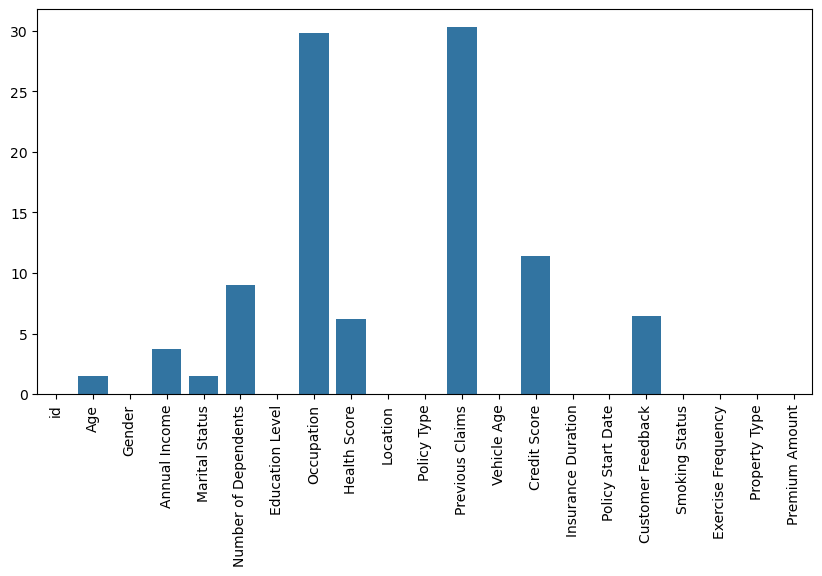

In [20]:
check_null(df)

In [21]:
df=df.dropna(subset=['Age','Marital Status','Vehicle Age']).reset_index(drop=True)

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 3.710919608725758,
 'Marital Status': 0.0,
 'Number of Dependents': 9.02076046518729,
 'Education Level': 0.0,
 'Occupation': 29.768716381333803,
 'Health Score': 6.190020753570313,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.280611516212314,
 'Vehicle Age': 0.0,
 'Credit Score': 11.38846014812159,
 'Insurance Duration': 9.849819797546804e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.441683649397634,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

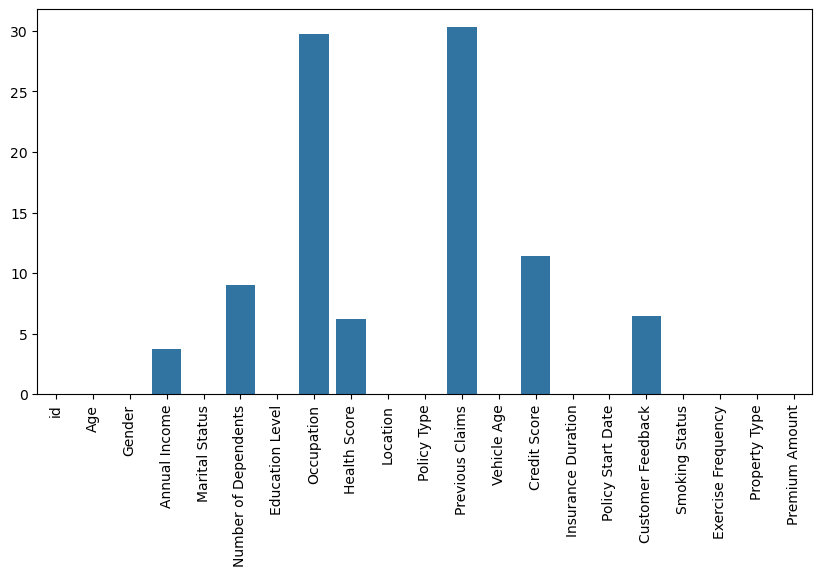

In [22]:
check_null(df) #in next step, we will work on filling values.

## **FILLING NAN VALUES**
## **WE WILL PERFORM EDA ON FEATURE RELATIONSHIP WHILE FILLING NAN.**


### ***trying to fill occupation value based on annual income and vice-versa***

In [25]:
df.groupby('Occupation')['Annual Income'].describe() 
#interesting that the salary of unemployed is higher than others.
#that may be the result of nan values present in this column

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Employed,231036.0,32665.389104,32146.664790,5.0,7982.0,23906.0,44456.0,149996.0
Self-Employed,229962.0,32716.875410,32215.924732,2.0,7984.0,23861.0,44641.0,149997.0
Unemployed,225403.0,32766.184075,32230.377323,2.0,7983.0,23947.0,44672.0,149997.0


In [26]:
df['Occupation'].value_counts()

Occupation
Employed         239816
Self-Employed    239029
Unemployed       234176
Name: count, dtype: int64

In [27]:
df[df['Occupation'].isnull()]['Annual Income'].describe() 
#the below output is fundamental for the function I am going to create.
#since there are nan present in income as well, so we will classify them as 'Unemployed'.

count    291171.000000
mean      32475.133914
std       31826.927586
min           1.000000
25%        8071.000000
50%       23891.000000
75%       44127.000000
max      149996.000000
Name: Annual Income, dtype: float64

In [28]:
def fill_occupation(Income):
    if pd.isna(Income):
        return 'Unemployed' 
    if Income<=8071:
        return 'Unemployed'
    elif Income<=44127:
        return 'Self-Employed'
    else:
        return 'Employed'

In [29]:
df['Occupation']=np.where(df['Occupation'].isna(),
                         np.vectorize(fill_occupation)(df['Annual Income']),
                          df['Occupation'])
#WE WILL CHECK THIS WTIH OUR EARLIER FUNCTION

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 3.710919608725758,
 'Marital Status': 0.0,
 'Number of Dependents': 9.02076046518729,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 6.190020753570313,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.280611516212314,
 'Vehicle Age': 0.0,
 'Credit Score': 11.38846014812159,
 'Insurance Duration': 9.849819797546804e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.441683649397634,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

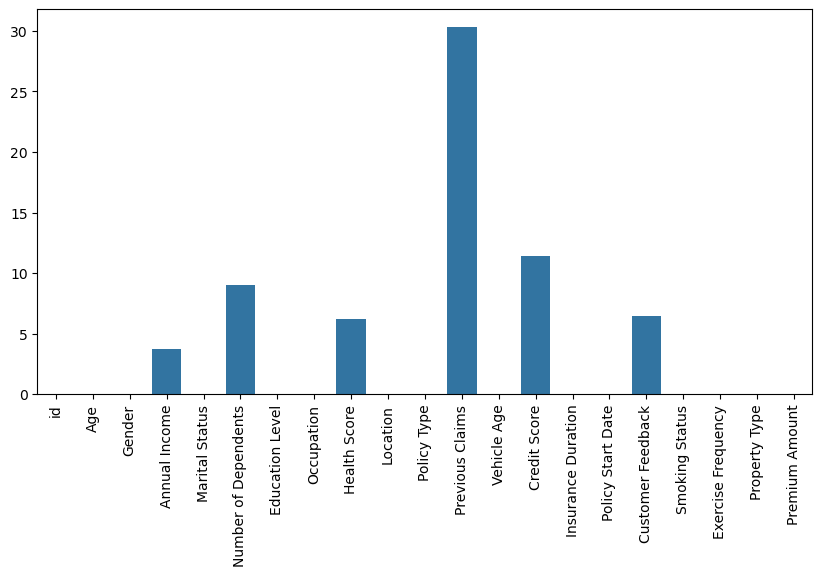

In [30]:
check_null(df) 
#since we have already dropped the rows with same nan values in both columns before,so every rows are filled based on annual income.

In [31]:
df.groupby('Occupation')['Annual Income'].describe() 
#filling this column shows significant impact on 25 percentile.

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Employed,303827.0,43467.494252,36797.263557,5.0,12982.0,35667.0,64438.0,149996.0
Self-Employed,375518.0,29435.411197,26309.885152,2.0,12228.0,23864.0,37875.0,149997.0
Unemployed,298227.0,25657.660869,30705.735024,1.0,3872.0,14000.0,36992.0,149997.0


In [32]:
#now are are doing same for Annual Income

In [33]:
df[df['Annual Income'].isnull()]
#looks like we have a lot of unemployed whose income are missing.
#i am still considering droppig rows if they all share same nan values.

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
22,22,22.0,Male,NaN,Divorced,4.0,PhD,Unemployed,25.583790,Urban,...,NaN,5.0,773.0,5.0,21:39.3,Good,Yes,Monthly,House,202
36,36,41.0,Female,NaN,Married,3.0,PhD,Self-Employed,14.001630,Urban,...,0.0,15.0,589.0,6.0,21:39.1,Average,No,Rarely,House,250
66,67,45.0,Male,NaN,Married,3.0,High School,Self-Employed,17.988631,Suburban,...,NaN,18.0,375.0,9.0,21:39.2,Average,Yes,Rarely,House,829
84,86,37.0,Male,NaN,Single,1.0,Bachelor's,Unemployed,13.038269,Suburban,...,NaN,6.0,562.0,2.0,21:39.2,Average,No,Weekly,House,61
85,87,52.0,Male,NaN,Married,2.0,PhD,Unemployed,28.864410,Rural,...,0.0,18.0,488.0,1.0,21:39.2,Average,No,Weekly,Apartment,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015089,1048413,27.0,Female,NaN,Divorced,1.0,Master's,Self-Employed,10.472700,Urban,...,1.0,0.0,428.0,3.0,21:39.2,Average,No,Monthly,House,2268
1015131,1048456,22.0,Female,NaN,Single,0.0,Bachelor's,Employed,12.038158,Rural,...,0.0,0.0,327.0,9.0,21:39.2,Poor,Yes,Daily,House,1615
1015164,1048489,56.0,Female,NaN,Divorced,0.0,Bachelor's,Employed,39.924173,Rural,...,NaN,0.0,431.0,7.0,21:39.1,Good,Yes,Daily,Apartment,2089
1015186,1048511,36.0,Male,NaN,Single,4.0,PhD,Unemployed,43.890019,Rural,...,1.0,8.0,332.0,1.0,21:39.2,Average,Yes,Weekly,Apartment,547


In [34]:
index_3=df[(df['Annual Income'].isnull())&(df['Credit Score'].isnull())&(df['Health Score'].isnull())&(df['Customer Feedback'].isnull())].index
df=df.drop(index_3).reset_index(drop=True)

In [35]:
#for filling annual income,i am following below strategies.
#25 percentile value for unemployed
#50 percentile for self-employed and employed.

In [36]:
df.loc[df['Occupation']=='Unemployed','Annual Income']

8           1733.0
10          8054.0
16         28266.0
22             NaN
25         72482.0
            ...   
1015201    28785.0
1015202     7058.0
1015203     5876.0
1015207     2557.0
1015214    35330.0
Name: Annual Income, Length: 318042, dtype: float64

In [37]:
q1_umemp=df.loc[df['Occupation']=='Unemployed']['Annual Income'].quantile(0.25)

In [38]:
q2_self=df.loc[df['Occupation']=='Self-Employed']['Annual Income'].quantile(0.5)

In [39]:
q2_emp=df.loc[df['Occupation']=='Employed']['Annual Income'].quantile(0.5)

In [40]:
occupation_map={'Unemployed':q1_umemp,
               'Employed':q2_emp,
               'Self-Employed': q2_self}

In [41]:
df['Annual Income']=df['Annual Income'].fillna(df['Occupation'].map(occupation_map))

In [42]:
df.dropna(subset=['Occupation', 'Annual Income'], how='all', inplace=True)


In [43]:
df['Occupation'].value_counts()

Occupation
Self-Employed    384575
Unemployed       318042
Employed         312603
Name: count, dtype: int64

In [44]:
df['Annual Income'].isna

<bound method Series.isna of 0           10049.0
1           31678.0
2           25602.0
3          141855.0
4           39651.0
             ...   
1015215     39766.0
1015216     44715.0
1015217     11928.0
1015218     80123.0
1015219     27048.0
Name: Annual Income, Length: 1015220, dtype: float64>

In [45]:
index_4=df[df['Occupation'] == 'nan'].index

In [46]:
 df=df.drop(index_4).reset_index(drop=True)
 #dropping those with same nan between annual income and occupation

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 0.0,
 'Marital Status': 0.0,
 'Number of Dependents': 9.020704871850436,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 6.1875258564646085,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.280628829219282,
 'Vehicle Age': 0.0,
 'Credit Score': 11.386103504659088,
 'Insurance Duration': 9.850081755678572e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.439195445322196,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

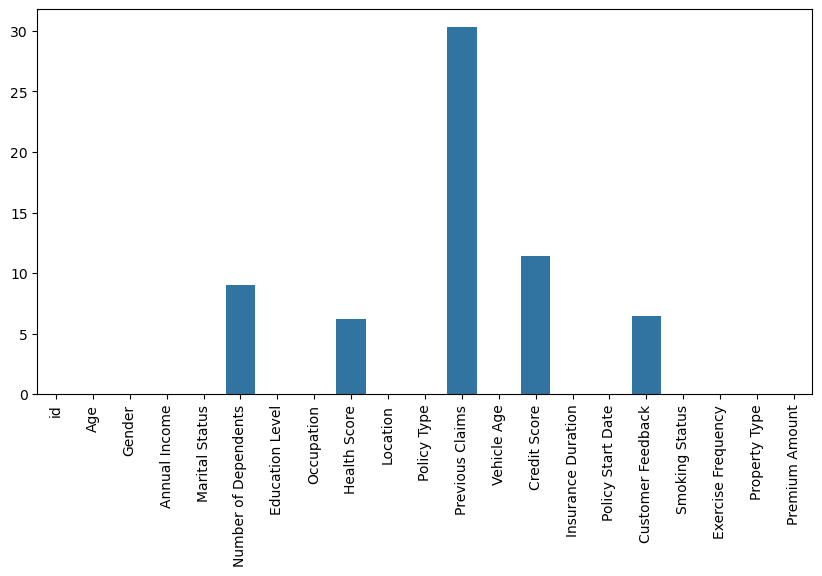

In [47]:
check_null(df)

In [48]:
#now filling number of dependents based on Maritial Status
df.groupby('Marital Status')['Number of Dependents'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,306213.0,2.010238,1.416649,0.0,1.0,2.0,3.0,4.0
Married,307718.0,2.012138,1.416502,0.0,1.0,2.0,3.0,4.0
Single,309709.0,2.007688,1.418593,0.0,1.0,2.0,3.0,4.0


In [49]:
df.loc[(df['Number of Dependents'].isna()) & (df['Age'] <= 20), 'Number of Dependents'] = 0

#for this specific condition, i would like to put 0 for number of dependents.
#for the rest, i will be using the same idea to impute values.

In [50]:
df.loc[(df['Number of Dependents'].isna()) & (df['Age'].between(21,30)), 'Number of Dependents'] = 2

In [51]:
df.loc[(df['Number of Dependents'].isna()) & (df['Age'] > 30), 'Number of Dependents'] = 3

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 0.0,
 'Marital Status': 0.0,
 'Number of Dependents': 0.0,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 6.1875258564646085,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 30.280628829219282,
 'Vehicle Age': 0.0,
 'Credit Score': 11.386103504659088,
 'Insurance Duration': 9.850081755678572e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.439195445322196,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

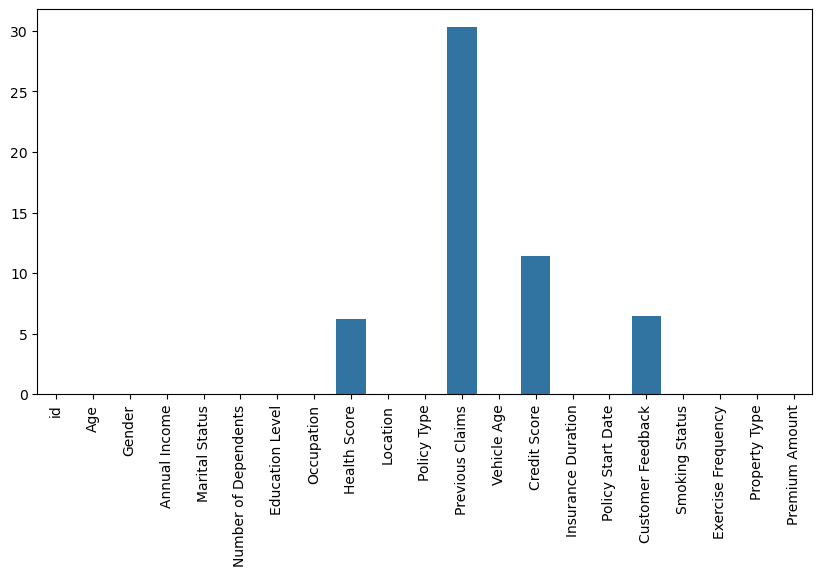

In [52]:
check_null(df)

In [53]:
#in next step, i will impute health score based on smoking and exercise frequency

In [54]:
df.groupby('Exercise Frequency')['Health Score'].describe()
# this shows that regardless of exercise frequency, the mean health score is same
#we will check if there is any relatioship with smoking pattern.

,count,mean,std,min,25%,50%,75%,max
Exercise Frequency,,,,,,,,
Daily,233214.0,25.631039,12.181886,2.024415,15.936263,24.592459,34.547187,58.886035
Monthly,238428.0,25.563935,12.214367,2.064241,15.924942,24.482855,34.479105,57.544431
Rarely,237587.0,25.616466,12.194310,2.012237,15.918658,24.582641,34.496852,57.923810
Weekly,243174.0,25.598099,12.203136,2.053458,15.879229,24.582544,34.480114,58.975914


In [55]:
df['Smoking Status'].value_counts()

Smoking Status
Yes    508998
No     506222
Name: count, dtype: int64

In [56]:
df.groupby('Smoking Status')['Health Score'].describe()
#Again it seems that the health score is same for smoking status as well.
#now, i am filling all those nan with its mean value.

,count,mean,std,min,25%,50%,75%,max
Smoking Status,,,,,,,,
No,475213.0,25.623937,12.208699,2.024415,15.933706,24.566223,34.547667,58.975914
Yes,477190.0,25.580541,12.188417,2.012237,15.895357,24.566341,34.452887,57.988848


In [57]:
df['Health Score']=df['Health Score'].fillna(value=df['Health Score'].mean())

In [58]:
#in the next step, i will fill "previous claims" based on the policy start date.

In [59]:
df['Policy Start Date'].value_counts()

Policy Start Date
21:39.2    494964
21:39.1    359665
21:39.3    160591
Name: count, dtype: int64

In [60]:
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce',utc=True)


C:\Users\rautu\AppData\Local\Temp\ipykernel_3892\3231855590.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce',utc=True)


In [61]:
df['Policy Start Date']=df['Policy Start Date'].dt.time

In [62]:
df['Previous Claims'].corr(df['Gender'].map({'Male':0,'Female':1}))

-8.73237127822894e-06

In [63]:
df.groupby('Insurance Duration')['Previous Claims'].describe()

,count,mean,std,min,25%,50%,75%,max
Insurance Duration,,,,,,,,
1.0,79718.0,0.997755,0.982521,0.0,0.0,1.0,2.0,8.0
2.0,77351.0,0.992618,0.974774,0.0,0.0,1.0,2.0,8.0
3.0,77988.0,1.000705,0.985091,0.0,0.0,1.0,2.0,8.0
4.0,78004.0,0.998154,0.975632,0.0,0.0,1.0,2.0,7.0
5.0,77920.0,0.998024,0.984731,0.0,0.0,1.0,2.0,8.0
6.0,77926.0,1.010856,0.988148,0.0,0.0,1.0,2.0,7.0
7.0,78710.0,1.009389,0.986435,0.0,0.0,1.0,2.0,7.0
8.0,79043.0,1.005642,0.983296,0.0,0.0,1.0,2.0,7.0
9.0,81144.0,0.998620,0.976902,0.0,0.0,1.0,2.0,9.0


In [64]:
df.select_dtypes(include='number').corrwith(df['Previous Claims'])
#since ther are no strong correlation between other features. i have decided to impute the column with its median value.

id                      0.000045
Age                     0.002193
Annual Income           0.038894
Number of Dependents   -0.004346
Health Score            0.002209
Previous Claims         1.000000
Vehicle Age            -0.000694
Credit Score            0.036761
Insurance Duration      0.003140
Premium Amount          0.047976
dtype: float64

In [65]:
df['Previous Claims']=df['Previous Claims'].fillna(df['Previous Claims'].median())

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 0.0,
 'Marital Status': 0.0,
 'Number of Dependents': 0.0,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 0.0,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 0.0,
 'Vehicle Age': 0.0,
 'Credit Score': 11.386103504659088,
 'Insurance Duration': 9.850081755678572e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 6.439195445322196,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0}

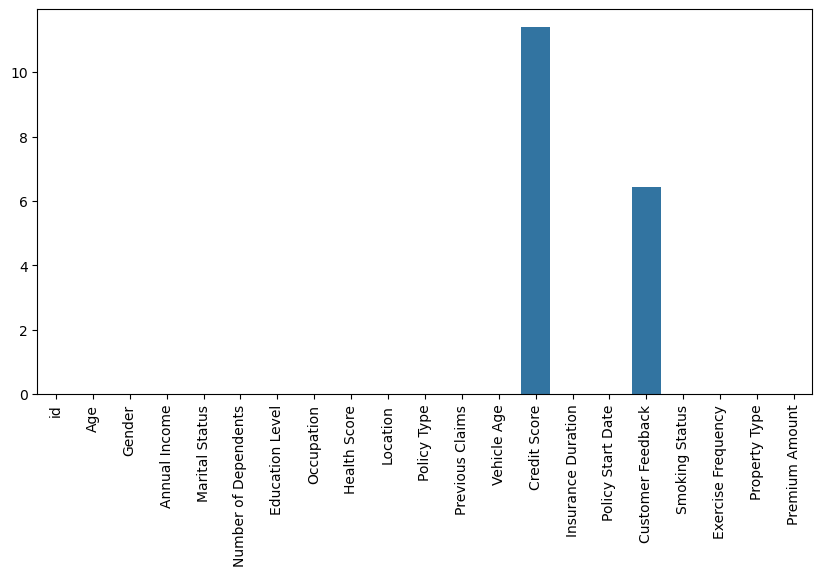

In [66]:
check_null(df)

In [67]:
#quick correlation check with numeric features.
df.select_dtypes(include='number').corrwith(df['Credit Score'])
#though negatively correlated with annual income, i will use this column as a baseline to impute nan.
#i will do this using binnig approach where i will impute the median credit value based on the annual income bin.

id                      0.001355
Age                     0.003555
Annual Income          -0.185481
Number of Dependents   -0.002711
Health Score            0.011990
Previous Claims         0.030592
Vehicle Age             0.000694
Credit Score            1.000000
Insurance Duration      0.000772
Premium Amount         -0.027711
dtype: float64

In [68]:
df[df['Credit Score'].isnull()]['Annual Income'].describe()

count    115594.000000
mean      27838.980077
std       27611.252287
min          11.000000
25%        7527.000000
50%       20365.000000
75%       37930.250000
max      149995.000000
Name: Annual Income, dtype: float64

In [69]:
bins = [0, 10000, 30000, 60000, 100000, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Income Bin']=pd.cut(df['Annual Income'],bins, labels)

In [70]:
median_value=df.groupby('Income Bin')['Credit Score'].median()


C:\Users\rautu\AppData\Local\Temp\ipykernel_3892\2152537781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_value=df.groupby('Income Bin')['Credit Score'].median()


In [71]:
df['Credit Score']=df['Credit Score'].fillna(df['Income Bin'].map(median_value))

In [72]:
df['Income Bin']

0           (10000.0, 30000.0]
1           (30000.0, 60000.0]
2           (10000.0, 30000.0]
3              (100000.0, inf]
4           (30000.0, 60000.0]
                  ...         
1015215     (30000.0, 60000.0]
1015216     (30000.0, 60000.0]
1015217     (10000.0, 30000.0]
1015218    (60000.0, 100000.0]
1015219     (10000.0, 30000.0]
Name: Income Bin, Length: 1015220, dtype: category
Categories (5, interval[float64, right]): [(0.0, 10000.0] < (10000.0, 30000.0] < (30000.0, 60000.0] < (60000.0, 100000.0] < (100000.0, inf]]

In [73]:
df['Customer Feedback'].value_counts()

Customer Feedback
Average    319862
Poor       317954
Good       312032
Name: count, dtype: int64

### Doing Correlation check with numeric features and Chi-Squared test with categorical features for 'customer feedback'

In [75]:
df.select_dtypes(include='number').corrwith(df['Customer Feedback'].map({'Poor':0,'Average':1,'Good':2}))
#shows extreme weak correlation with numeric features

id                      0.000609
Age                     0.001167
Annual Income           0.001059
Number of Dependents    0.000556
Health Score            0.001598
Previous Claims         0.001782
Vehicle Age            -0.001083
Credit Score           -0.001614
Insurance Duration     -0.000759
Premium Amount         -0.001474
dtype: float64

In [76]:
from scipy.stats import chi2_contingency

In [77]:
for col in df.select_dtypes(include='object'):
    if col!='Customer Feedback':
        crosstab=pd.crosstab(df[col],df['Customer Feedback'])
        chi2,P,dof,exp=chi2_contingency(crosstab)
        print(f"{col}: chi2={chi2}, P_value={P}")
#shows that EXERCISE FREQUENCY AND PROPERTY TYPE ARE SIGNIFICANT TO THIS FEATURE.

Gender: chi2=3.203317562043628, P_value=0.20156189349334974
Marital Status: chi2=8.572407158097867, P_value=0.07272258730566684
Education Level: chi2=4.074168939688087, P_value=0.6666398814247323
Occupation: chi2=3.825189613207832, P_value=0.43018048034597667
Location: chi2=6.923264641262666, P_value=0.13999933163991324
Policy Type: chi2=1.5775887561679696, P_value=0.8128143746621408
Policy Start Date: chi2=3.7216375043004604, P_value=0.44498669714794326
Smoking Status: chi2=1.1196120441980522, P_value=0.5713198765312958
Exercise Frequency: chi2=30.123839688327806, P_value=3.7233716830366516e-05
Property Type: chi2=11.899945866168412, P_value=0.018111011273456105


In [78]:
index_6=df[(df['Customer Feedback'].isna())&(df['Credit Score'].isna())].index

In [79]:
#i am dropping those rows with same missing data between these columns.
df=df.drop(index_6).reset_index(drop=True)

In [80]:
pd.crosstab(df['Customer Feedback'], df['Exercise Frequency'])
#since the count for customer feedback in all groups of exercise frequency are quite similiar.
#so i will do the random sampling from overall CUSTOMER FEEDBACK data to fill the nan value.

Exercise Frequency,Daily,Monthly,Rarely,Weekly
Customer Feedback,,,,
Average,78331,80279,79595,81657
Good,76958,76988,78109,79977
Poor,77532,80208,79367,80847


In [81]:
# Get observed distribution
probs = df['Customer Feedback'].value_counts(normalize=True)

In [82]:
probs

Customer Feedback
Average    0.336751
Poor       0.334742
Good       0.328507
Name: proportion, dtype: float64

In [83]:
index_7=df[df['Customer Feedback'].isna()].index

In [84]:
df.loc[index_7,'Customer Feedback']= np.random.choice(
    probs.index,
    size=len(index_7),
    p=probs.values
)

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 0.0,
 'Marital Status': 0.0,
 'Number of Dependents': 0.0,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 0.0,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 0.0,
 'Vehicle Age': 0.0,
 'Credit Score': 0.0,
 'Insurance Duration': 9.850081755678572e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 0.0,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0,
 'Income Bin': 0.0}

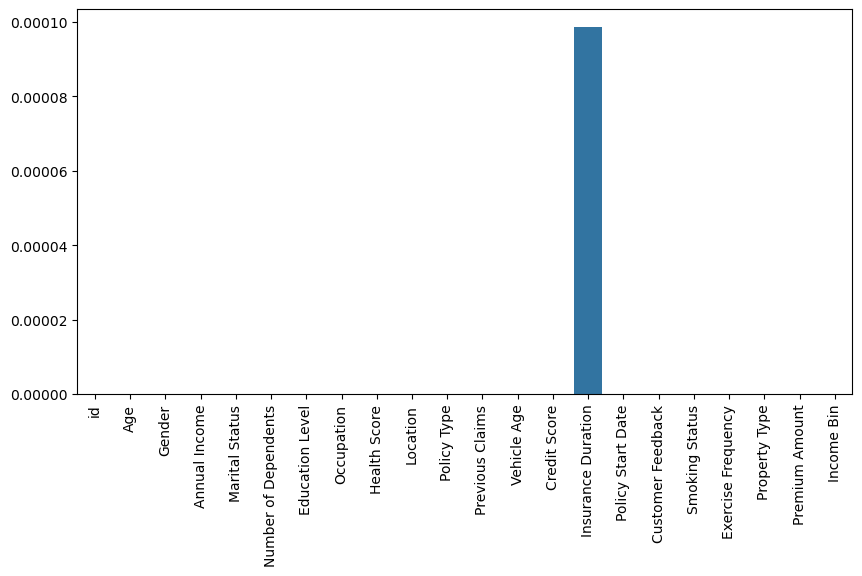

In [85]:
check_null(df)

In [86]:
df['Insurance Duration'].value_counts()

Insurance Duration
9.0    116508
1.0    114021
8.0    113353
7.0    113074
6.0    111977
4.0    111970
5.0    111840
3.0    111624
2.0    110852
Name: count, dtype: int64

In [87]:
df[df['Insurance Duration'].isnull()]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Income Bin
688752,711358,64.0,Male,30206.0,Married,3.0,Master's,Employed,49.551038,Suburban,...,18.0,581.0,NaN,21:39:12,Poor,Yes,Rarely,Apartment,1044,"(30000.0, 60000.0]"


In [88]:
df.at[683376,'Insurance Duration']=5

{'id': 0.0,
 'Age': 0.0,
 'Gender': 0.0,
 'Annual Income': 0.0,
 'Marital Status': 0.0,
 'Number of Dependents': 0.0,
 'Education Level': 0.0,
 'Occupation': 0.0,
 'Health Score': 0.0,
 'Location': 0.0,
 'Policy Type': 0.0,
 'Previous Claims': 0.0,
 'Vehicle Age': 0.0,
 'Credit Score': 0.0,
 'Insurance Duration': 9.850081755678572e-05,
 'Policy Start Date': 0.0,
 'Customer Feedback': 0.0,
 'Smoking Status': 0.0,
 'Exercise Frequency': 0.0,
 'Property Type': 0.0,
 'Premium Amount': 0.0,
 'Income Bin': 0.0}

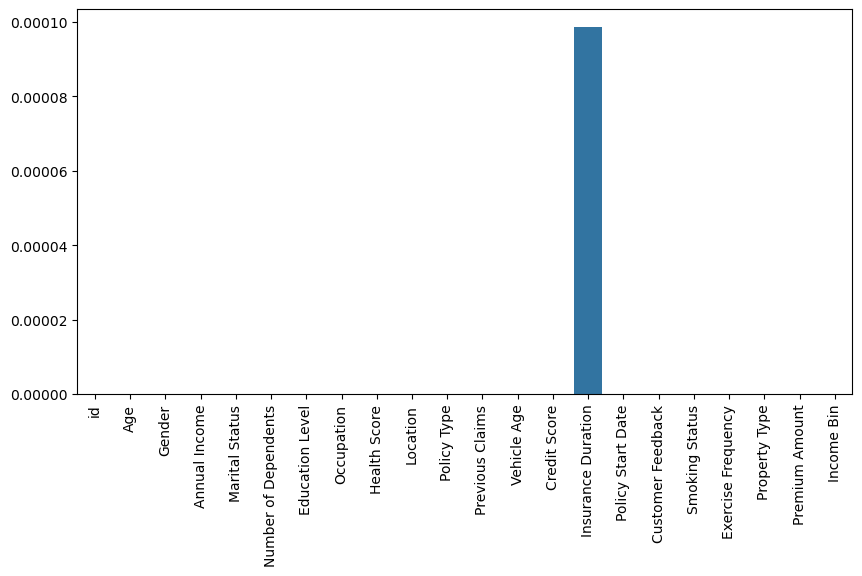

In [89]:
check_null(df)
#we have finally finished preprocessing step.

#### SO FAR HAVE COMPLETED DATA PREPROCESSING WITH EDA...
#### ALONG THE WAY, WE HAVE USED SEVERAL STRATEGIES TO FILL THE MISSING VALUES.
#### WE HAVE ALSO CHECKED THE CORRELATION BETWEEN THE FEATURES AND PERFORM HYPOTHESIS TESTING USING CHI SQUARED TEST.


# IN THE CELL BELOW WE WILL FOCUS ON MORE DETAIL RELATIONSHIP BETWEEN FEATURES. 

In [92]:
numeric_data=df.select_dtypes(include='number')

In [93]:
cat_data=df.select_dtypes(include='object')

<Axes: >

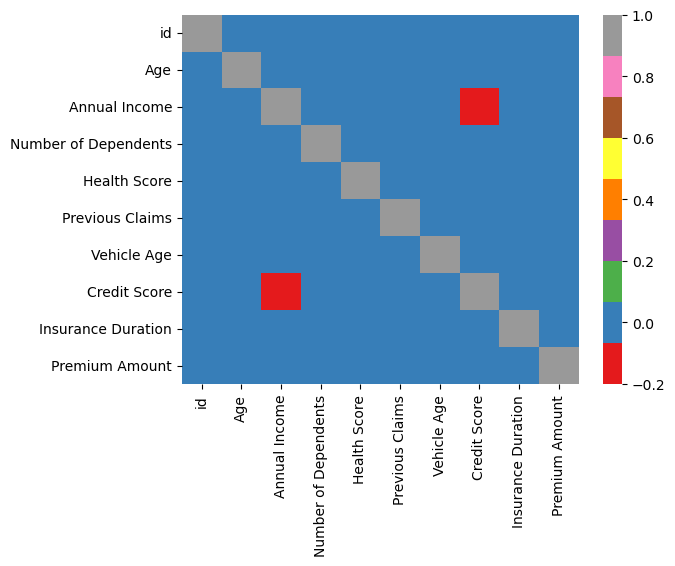

In [94]:
sns.heatmap(data=numeric_data.corr(),cmap='Set1')
#it shows that there are no strong correlation between features.
# in fact those red distinct block represents some negative correlation.

In [95]:
numeric_data.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount'],
      dtype='object')

C:\Users\rautu\AppData\Local\Temp\ipykernel_3892\514606500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=numeric_data.corrwith(numeric_data['Premium Amount'].transpose())[:-1],palette='Set1')


Text(0.5, 1.0, 'correlation with premium amount')

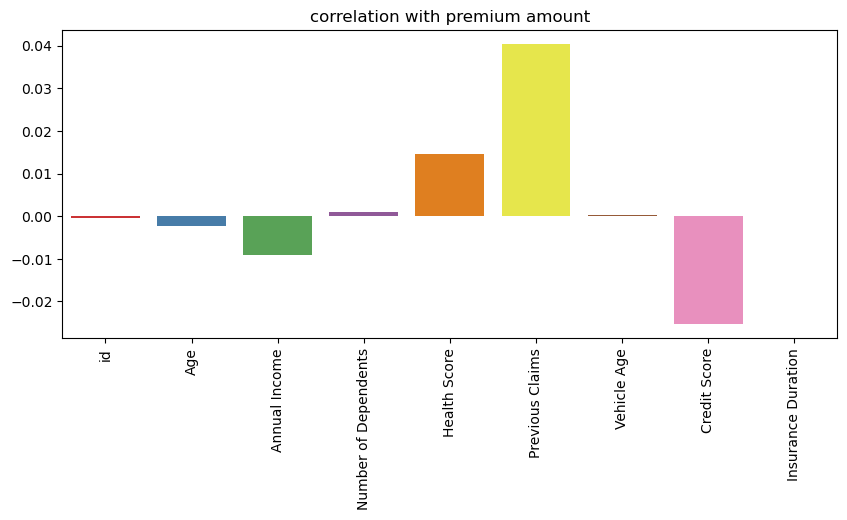

In [96]:
#checking if there is any correlation with our label "premium amount"
plt.figure(figsize=(10,4))
sns.barplot(data=numeric_data.corrwith(numeric_data['Premium Amount'].transpose())[:-1],palette='Set1')
plt.xticks(rotation=90);
plt.title('correlation with premium amount')

C:\Users\rautu\AppData\Local\Temp\ipykernel_3892\725875300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi.keys(),y=chi.values(),palette='Set1')


{'Gender': 0.00026761823972758876,
 'Marital Status': 0.37857910295819014,
 'Education Level': 0.12988522853302603,
 'Occupation': 0.0,
 'Location': 0.2732783104593536,
 'Policy Type': 0.7066697184631783,
 'Policy Start Date': 1.0772250075969877e-26,
 'Customer Feedback': 0.15822068125771185,
 'Smoking Status': 0.002634991048426814,
 'Exercise Frequency': 0.8748391399620739,
 'Property Type': 0.0003244231768971524}

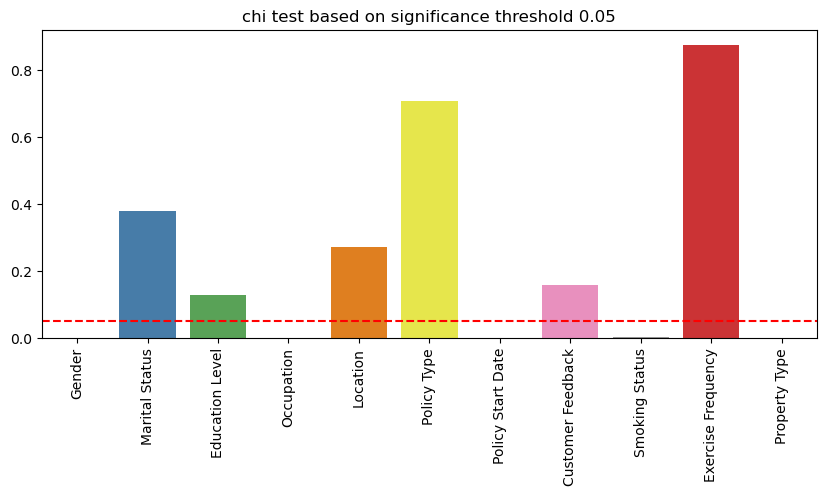

In [97]:
#WE WILL ALSO PERFORM CHI-SQUARED TEST TO FIND ANY RELATIONSHIP BETWEEN INSURANCE PREMIUM BETWEEN CATEGORICALFEATURES
# since we need all categorical features for this test, so we are going to create bin for INSURANCE PREMIUM
numeric_data['Premium Bin']=pd.qcut(numeric_data['Premium Amount'],q=5,duplicates='drop')
chi={}
for cols in cat_data.columns:
    table_2=pd.crosstab(cat_data[cols],numeric_data['Premium Bin'])
    chi2,P,dof,ex=chi2_contingency(table_2)
    chi[cols]=P
plt.figure(figsize=(10,4))
sns.barplot(x=chi.keys(),y=chi.values(),palette='Set1')
plt.xticks(rotation=90)
plt.axhline(y=0.05,ls="--",color='red')
plt.title('chi test based on significance threshold 0.05')
chi

##### based on above chart, it seems some categorical feature have relationship with Premium amount

In [99]:
numeric_data.drop('Premium Bin',axis=1).corrwith(numeric_data['Premium Amount'])

id                     -0.000327
Age                    -0.002362
Annual Income          -0.009157
Number of Dependents    0.000989
Health Score            0.014466
Previous Claims         0.040329
Vehicle Age             0.000215
Credit Score           -0.025311
Insurance Duration      0.000094
Premium Amount          1.000000
dtype: float64

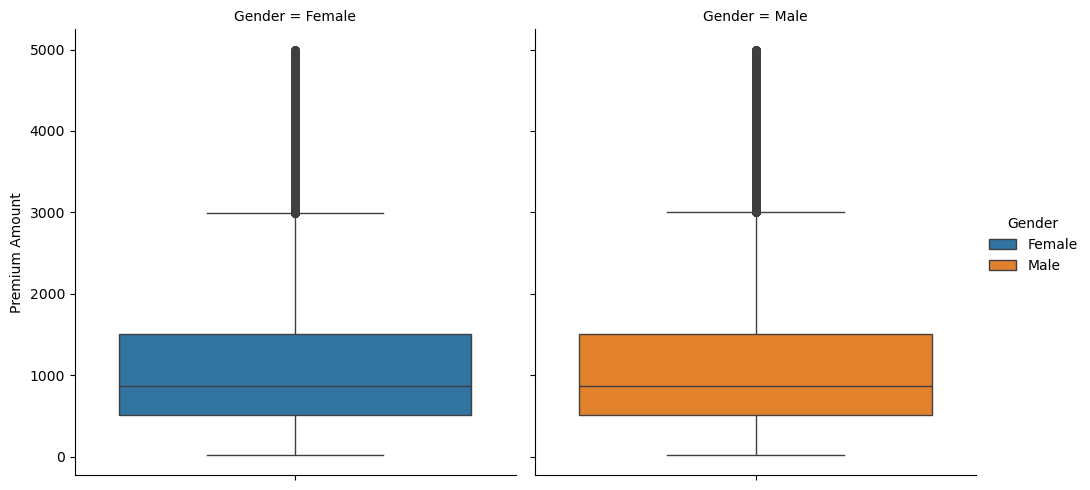

In [100]:
sns.catplot(data=df,y='Premium Amount',col='Gender',kind='box', hue='Gender')
#looks like the both male and female show a similiar distribution of premium amount.
##precisely speaking, more data points lies above median, suggesting some policy holders pay significant higher preium price.. 
### the data is skewed towards right: more outliers as high payment amount.

In [101]:
numeric_data.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Premium Bin'],
      dtype='object')

In [102]:
cat_data.columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [103]:
df['Policy Type'].value_counts()

Policy Type
Premium          339677
Comprehensive    338190
Basic            337353
Name: count, dtype: int64

In [104]:
stats=df.groupby('Location')[['Premium Amount','Annual Income']].agg(['min','mean','median','max'])
#gives me the multiindex columns.
#i am going to flat the multiindex and then plot the chart to check the relationship between our categorical and numerical features

In [105]:
stats.columns=stats.columns = stats.columns.to_flat_index().map('_'.join)

In [106]:
stats=stats.reset_index()

In [107]:
stats.columns

Index(['Location', 'Premium Amount_min', 'Premium Amount_mean',
       'Premium Amount_median', 'Premium Amount_max', 'Annual Income_min',
       'Annual Income_mean', 'Annual Income_median', 'Annual Income_max'],
      dtype='object')

In [108]:
stats

,Location,Premium Amount_min,Premium Amount_mean,Premium Amount_median,Premium Amount_max,Annual Income_min,Annual Income_mean,Annual Income_median,Annual Income_max
0,Rural,20,1099.132031,870.0,4997,2.0,31999.667855,23860.0,149996.0
1,Suburban,20,1100.584927,870.0,4988,2.0,32060.909785,23864.0,149997.0
2,Urban,20,1102.737596,872.0,4999,1.0,32030.240377,23778.0,149997.0


<Figure size 1000x400 with 0 Axes>

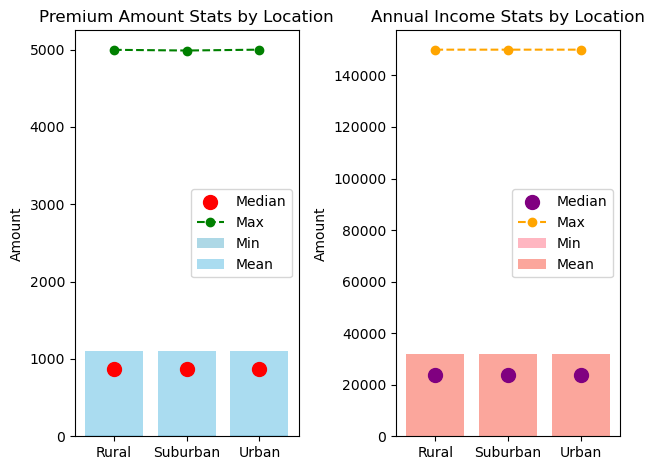

In [109]:
fig=plt.figure(figsize=(10,4))
fig,axes=plt.subplots(nrows=1,ncols=2)
axes[0].bar(stats['Location'], stats['Premium Amount_min'], color='lightblue', label='Min')
axes[0].bar(stats['Location'], stats['Premium Amount_mean'], color='skyblue', label='Mean', alpha=0.7)
axes[0].scatter(stats['Location'], stats['Premium Amount_median'], color='red', label='Median', s=100, zorder=5)
axes[0].plot(stats['Location'], stats['Premium Amount_max'], color='green', marker='o', linestyle='--', label='Max')
axes[0].set_title('Premium Amount Stats by Location')
axes[0].set_ylabel('Amount')
axes[0].legend()
axes[1].bar(stats['Location'], stats['Annual Income_min'], color='lightpink', label='Min')
axes[1].bar(stats['Location'], stats['Annual Income_mean'], color='salmon', label='Mean', alpha=0.7)
axes[1].scatter(stats['Location'], stats['Annual Income_median'], color='purple', label='Median', s=100, zorder=5)
axes[1].plot(stats['Location'], stats['Annual Income_max'], color='orange', marker='o', linestyle='--', label='Max')
axes[1].set_title('Annual Income Stats by Location')
axes[1].set_ylabel('Amount')
axes[1].legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='Annual Income', ylabel='Count'>

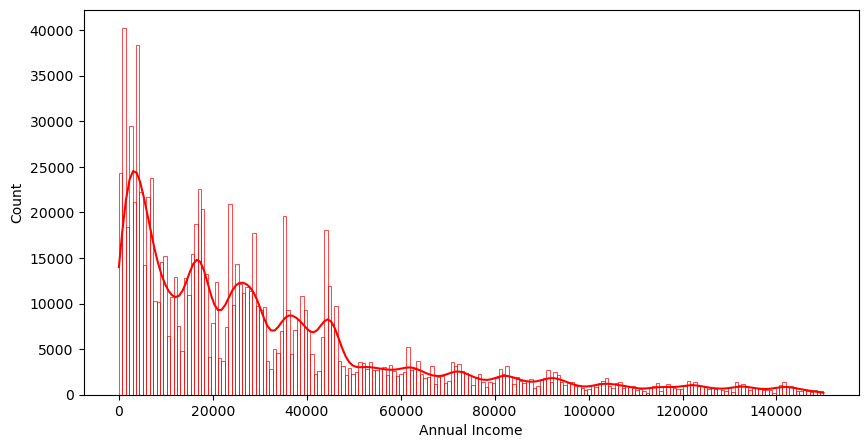

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(df['Annual Income'], color='red', kde=True,fill=False)

#### *so far we have seen that the dataset is randomly dispersed without any lienar relationship within features*
#### IN THE NEXT STEP WE WILL HEAD TO OUR REGRESSION TASK
#### WE WILL BEGIN BY DROPPING THE OUTLIERS


#### NOTE THAT THIS DATASET IS OVER A MILLION ROWS, TRAINING THE MODEL ON THE ENTIRE DATA IS COMPUTATIONALLY INFEASIBLE CONSIDERING THE RESOURCE I HAVE. THEREFORE, i WILL ADOPT A RANDOM SAMPLING STRATEGY THAT PRESERVES THE UNDERLYING DISTRIBUTION AND VARIANCE OF THE ORIGINAL DATASET, ENSURING MODEL IS TRAINED ON A REPRESNTATIVE SUBSET WHILE MAINTAINING PERFORMANCE AND RELIABILITY

In [113]:
Q3=df['Premium Amount'].quantile(0.75)

In [114]:
Q2=df['Premium Amount'].quantile(0.5)

In [115]:
Q1=df['Premium Amount'].quantile(0.25)

In [116]:
IQR=Q3-Q1

In [117]:
UPPER_WHISKER=Q3+IQR

In [118]:
LOWER_WHISKER=Q1-IQR

In [119]:
Outliers=df[(df['Premium Amount']>=UPPER_WHISKER)|(df['Premium Amount']<=LOWER_WHISKER)]

In [120]:
clean_df=df.drop(Outliers.index).reset_index(drop=True)

In [121]:
100-(len(clean_df)/1048575*100) #we have dropped almost 12 percentage of total data so far in our step.

11.183558639105456

### preprocessing for model training

In [123]:
clean_df=clean_df.drop('Income Bin',axis=1)

In [124]:
#clean_df.to_csv(r"C:\Users\rautu\OneDrive\Desktop\cleaned_insurance_dataset.csv", index=False, encoding="utf-8")

In [125]:
model_data=clean_df.sample(n=300000, random_state=101) #roughly 33 percent of total data.

In [126]:
len(model_data)

300000

#### To validate our claim, we are going to plot the 'Premium Amount' and check the dispersion.

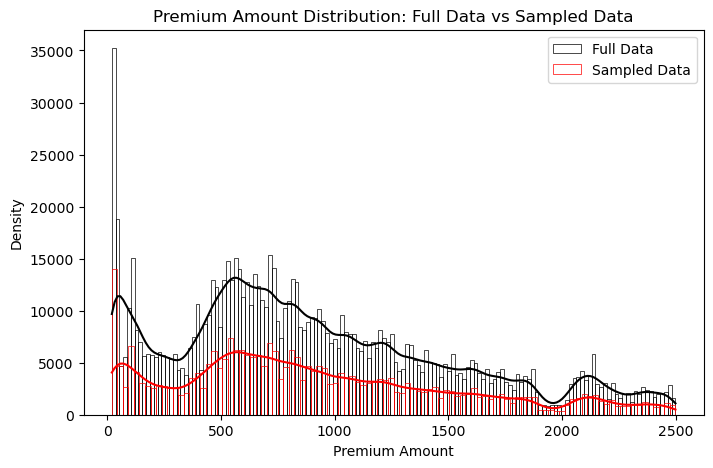

In [128]:
plt.figure(figsize=(8,5))

sns.histplot(clean_df['Premium Amount'], color='black', kde=True, fill=False, label='Full Data')
sns.histplot(model_data['Premium Amount'], color='red', kde=True, fill=False, label='Sampled Data')

plt.title("Premium Amount Distribution: Full Data vs Sampled Data")
plt.xlabel("Premium Amount")
plt.ylabel("Density")
plt.legend()


### The above plot verifies that random sampling allows data sampling preserving data variance.
## In next step, we will focus on steps of trainig, testing and evaluating several model.
# Note that we will be evaluating the model based on RMSLE as our target has skewed/bimodal distribution.

In [130]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor

In [131]:
model_data.columns



Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [132]:
X=model_data.drop(['Premium Amount','id'],axis=1)
y=model_data['Premium Amount']

In [133]:
X_columns=X.select_dtypes(include='object').columns

In [134]:
numeric_X=X.select_dtypes(include='number').columns

In [135]:
X_columns

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Policy Start Date', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type'],
      dtype='object')

In [136]:
nominal_cols = ['Gender', 'Marital Status', 'Smoking Status','Policy Start Date']
ordinal_cols = ['Customer Feedback','Education Level', 'Occupation', 'Location', 'Policy Type', 'Property Type','Exercise Frequency']

### splitting the data in train/validate/test split
#### 60% training (50% of remaining as validate and other 50% as final holdout test set)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [139]:
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.50, random_state=42)

In [140]:
transformer=ColumnTransformer(transformers=[('nominal',OneHotEncoder(handle_unknown='ignore'), nominal_cols),
                                           ('ordinal',OrdinalEncoder(), ordinal_cols),
                                           ('num',StandardScaler(),numeric_X)])

In [141]:
def my_model(model,X_train,y_train,X_val,y_val):
    pipe=Pipeline(steps=[('col_transformer',transformer),
                        ('used_model',model)])
    pipe.fit(X_train,y_train)
    pred=pipe.predict(X_val)
    mae=mean_absolute_error(y_val,pred)
    rmse=np.sqrt(mean_squared_error(y_val,pred))
    rmsle = np.sqrt(mean_squared_log_error(y_val,np.maximum(pred, 0)))
    print(f"Used model is: {model}")
    print(f"The Mean Absolute Error: {mae:.4f}")
    print(f"THE RMSE is: {rmse:.4f}")
    print(f"RMSLE IS:{rmsle}")
    

In [142]:
my_model(model=RandomForestRegressor(n_estimators=200),
         X_train=X_train,
         y_train=y_train,
         X_val=X_val,
         y_val=y_val
        )
         
        
         

Used model is: RandomForestRegressor(n_estimators=200)
The Mean Absolute Error: 481.0681
THE RMSE is: 602.4987
RMSLE IS:1.0713801985935252


In [143]:
my_model(model=XGBRegressor(n_estimators=100,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42,n_jobs=-1),
         X_train=X_train,
         y_train=y_train,
         X_val=X_val,
         y_val=y_val
        )

Used model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)
The Mean Absolute Error: 477.3205
THE RMSE is: 598.8772
RMSLE IS:1.0656632990953974


In [146]:
from catboost import CatBoostRegressor


In [148]:
my_model(model=CatBoostRegressor(
    iterations=600,
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=100),
         X_train=X_train,
         y_train=y_train,
         X_val=X_val,
         y_val=y_val
        )

0:	learn: 615.0915946	total: 203ms	remaining: 2m 1s
100:	learn: 597.7245955	total: 9.29s	remaining: 45.9s
200:	learn: 593.6834374	total: 15.3s	remaining: 30.4s
300:	learn: 589.7539587	total: 23.4s	remaining: 23.3s
400:	learn: 586.5224652	total: 29s	remaining: 14.4s
500:	learn: 583.3371297	total: 34.7s	remaining: 6.86s
599:	learn: 580.3405486	total: 43s	remaining: 0us
Used model is: <catboost.core.CatBoostRegressor object at 0x0000011FA253FE00>
The Mean Absolute Error: 475.5771
THE RMSE is: 598.6817
RMSLE IS:1.0620792235497802


### Based on the performance of differnt model used earlier, i will use CATBOOSTREGRESSOR as it has better performance.
### In the cell below, i will use final hold out test set to test the CATBOOSTREGRESSOR, and consider it's accuracy metrics as a final accuracy for the deployment purpose. 

In [150]:
my_model(model=CatBoostRegressor(
    iterations=600,
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=100),
         X_train=X_train,
         y_train=y_train,
         X_val=X_test,
         y_val=y_test
        )

0:	learn: 615.0915946	total: 73.6ms	remaining: 44.1s
100:	learn: 597.7245955	total: 8.22s	remaining: 40.6s
200:	learn: 593.6834374	total: 14.9s	remaining: 29.5s
300:	learn: 589.7539587	total: 21s	remaining: 20.8s
400:	learn: 586.5224652	total: 27.6s	remaining: 13.7s
500:	learn: 583.3371297	total: 33.5s	remaining: 6.62s
599:	learn: 580.3405486	total: 41.2s	remaining: 0us
Used model is: <catboost.core.CatBoostRegressor object at 0x0000011FCA80AE40>
The Mean Absolute Error: 477.7375
THE RMSE is: 600.6466
RMSLE IS:1.0758143678525247


In [152]:
pipeline = Pipeline(steps=[
    ('col_transformer', transformer),  
    ('catboost_model', CatBoostRegressor(
        iterations=600,
        depth=8,
        learning_rate=0.05,
        l2_leaf_reg=3,
        random_seed=42,
        verbose=0 
    ))
])

In [154]:
pipeline.fit(X, y)  # we are expecting error (RMSLE~1.0588)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Marital Status',
                                                   'Smoking Status',
                                                   'Policy Start Date']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Customer Feedback',
                                                   'Education Level',
                                                   'Occupation', 'Location',
                                                   'Policy Type',
                                                   'Property Type',
                                                   'Exercise Frequency']),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration'],
      dtype='object'))])),
                ('catboost_model',
                 <catboost.core.CatBoostRegressor object at 0x0000011FCA80AED0>)])

In [ ]:
from joblib import dump,load

In [ ]:
dump(pipeline,"Premium model.pkl")

In [ ]:
nominal_column=[col for col in df.columns if col in nominal_cols]

In [ ]:
ordinal_column=list(ordinal_cols)

In [ ]:
numeric_columns=list(numeric_X)

In [ ]:
ordinal_column

In [ ]:
nominal_column

In [ ]:
numeric_columns

In [ ]:
columns_dict = {
    "numeric_columns": numeric_columns,
    "ordinal_columns": ordinal_column,
    "nominal_columns": nominal_column
}


In [ ]:
dump(columns_dict,"premimum model columns.pkl")

# Now I will design a RESTAPI using FLASK that takes user input from front-end, process it using our "premium model" and takes output.
# for better input handling, we could have validated the string/object column for data accuracy.
# Also i am going to use our trained model to predict the rest of 'X' and have a comphrensive analysis using tableau.

In [156]:
tableau_data=clean_df.drop(model_data.index).sample(n=300000,random_state=202)

In [158]:
tableau_data_X=tableau_data.drop(['Premium Amount','id'],axis=1)

In [160]:
tableau_data['Predicted Premium']=pipeline.predict(tableau_data_X)

In [166]:
tableau_data[['Predicted Premium','Premium Amount']]

,Predicted Premium,Premium Amount
269606,915.989603,1296
784939,938.178992,693
31996,945.093526,1374
661578,941.042490,781
544709,1029.156557,38
...,...,...
832220,905.868310,898
230724,1037.782960,1118
260976,943.372823,1817
266529,914.540026,603


In [168]:
tableau_data.to_csv(r"C:\Users\rautu\OneDrive\Desktop\tableau_insurance_dataset.csv", index=False, encoding="utf-8")

In [172]:
tableau_data.loc[544709]

id                             613612
Age                              47.0
Gender                           Male
Annual Income                117842.0
Marital Status                 Single
Number of Dependents              3.0
Education Level           High School
Occupation                   Employed
Health Score                 9.741982
Location                        Rural
Policy Type             Comprehensive
Previous Claims                   3.0
Vehicle Age                       5.0
Credit Score                    813.0
Insurance Duration                1.0
Policy Start Date            21:39:06
Customer Feedback             Average
Smoking Status                     No
Exercise Frequency             Rarely
Property Type                   Condo
Premium Amount                     38
Predicted Premium         1029.156557
Name: 544709, dtype: object